# 1. Create the Environment

In [1]:
import gym_super_mario_bros

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Preprocess the Environment

In [15]:
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### A. Simplify Actions

In [16]:
env.action_space

Discrete(7)

In [17]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)

AttributeError: 'DummyVecEnv' object has no attribute 'reward_range'

In [18]:
env.action_space

Discrete(7)

### B. Grayscale

TypeError: Invalid shape (1, 240, 256, 4) for image data

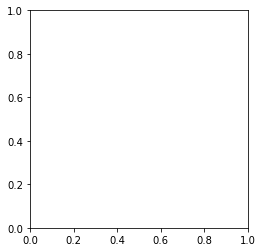

In [19]:
state = env.reset()
plt.imshow(state)

In [8]:
env = GrayScaleObservation(env, keep_dim=True)

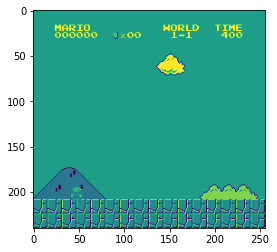

In [9]:
state = env.reset()
plt.imshow(state)

### C. Vectorize

In [10]:
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

# 3. Create the Agent

In [11]:
from stable_baselines3 import PPO

In [13]:
model = PPO('CnnPolicy', env, verbose=1)

Using cuda device
Wrapping the env in a VecTransposeImage.


# 4. Train the Agent

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback

In [ ]:
save_path = './Saved Models/'
callback = CheckpointCallback(save_freq = 25000, save_path = save_path, name_prefix = 'MarioAI')

In [ ]:
model.learn(total_timesteps=2000000, callback=callback)

# 5. Watch Mario at 250,000 Timesteps

In [14]:
model = PPO.load('./Saved_Models/Control_250000_steps', env=env)

FileNotFoundError: [Errno 2] No such file or directory: 'Saved_Models\\Control_250000_steps.zip'

In [ ]:
state = env.reset()

while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [ ]:
env.close()

# 6. Watch Mario at 6,000,000 Timesteps

In [ ]:
model = PPO.load('./Control/Saved_Models/Control_6000000_steps', env=env)

In [ ]:
state = env.reset()

while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [ ]:
env.close()